# Weather Forecasting and Prediction using ANN 

## Data Fetching

In [193]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request

from plotly import __version__
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from geopy.geocoders import Nominatim
import cufflinks as cf
import plotly.express as px
import datetime as dt
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
pd.set_option('display.max_columns', None)

In [194]:
start_date = '1990/01/01'

In [195]:
start_date = start_date.replace('/','')

In [196]:
end_date = dt.datetime.today().strftime("%Y%m%d")

In [197]:
address = input("Enter City Name:")

Enter City Name:Guwahati


In [198]:
geolocator = Nominatim(user_agent="http")
location = geolocator.geocode(address)
print(location.address)
print((location.latitude, location.longitude))
latitude = location.latitude
longitude = location.longitude

Guwahati, Kamrup Metropolitan, Assam, 781015, India
(26.1805978, 91.753943)


In [199]:
url = 'https://power.larc.nasa.gov//api/temporal/daily/point?parameters=T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE&community=SB&longitude={}6&latitude={}&start={}&end={}&format=CSV'.format(longitude,latitude,start_date,end_date)

In [200]:
urllib.request.urlretrieve(url,'weather.csv')

('weather.csv', <http.client.HTTPMessage at 0x17f8cb970>)

In [201]:
# Extract the header from the csv file.
header = ''
n_header_lines = 14 # The fixed number of header lines

with open ('weather.csv', 'r') as file:
    lines = file.readlines()
    header_lines = []
    for i in range (n_header_lines):
        header_lines.append (lines[i])
    header = ''.join (header_lines)

print (header)

-BEGIN HEADER-
NASA/POWER CERES/MERRA2 Native Resolution Daily Data 
Dates (month/day/year): 01/01/1990 through 11/16/2022 
Location: Latitude  26.1806   Longitude 91.7539 
Elevation from MERRA-2: Average for 0.5 x 0.625 degree lat/lon region = 400.01 meters
The value for missing source data that cannot be computed or is outside of the sources availability range: -999 
Parameter(s): 
T2M_MAX         MERRA-2 Temperature at 2 Meters Maximum (C) 
T2M_MIN         MERRA-2 Temperature at 2 Meters Minimum (C) 
RH2M            MERRA-2 Relative Humidity at 2 Meters (%) 
PRECTOTCORR     MERRA-2 Precipitation Corrected (mm/day) 
PS              MERRA-2 Surface Pressure (kPa) 
WS10M_RANGE     MERRA-2 Wind Speed at 10 Meters Range (m/s) 
-END HEADER-



In [202]:
df = pd.read_csv('weather.csv', header=n_header_lines)

In [203]:
df.head()

YEAR  MO  DY  T2M_MAX  T2M_MIN   RH2M  PRECTOTCORR     PS  WS10M_RANGE
0  1990   1   1    19.62     5.66  78.38          0.0  96.93         1.97
1  1990   1   2    20.03     5.87  73.81          0.0  96.94         1.05
2  1990   1   3    21.14     6.32  68.69          0.0  97.00         1.69
3  1990   1   4    21.93     7.04  70.31          0.0  97.05         2.16
4  1990   1   5    20.94     7.03  73.06          0.0  97.17         1.41

In [204]:
fig = px.line(data_frame=df[['RH2M','PRECTOTCORR']])
fig.update_yaxes(range=[0, 200])
fig.show()

In [205]:
df['WS10M_RANGE'] = 60*df['WS10M_RANGE']
fig = px.line(data_frame=df[['WS10M_RANGE','PRECTOTCORR']])
fig.update_yaxes(range=[-50, 300])
fig.update_xaxes(range=[0, 500])
df['WS10M_RANGE'] = df['WS10M_RANGE']/60
fig.show()

In [206]:
fig = px.line(data_frame=df[['T2M_MAX','T2M_MIN','PRECTOTCORR']])
fig.update_yaxes(range=[-50, 200])
fig.update_xaxes(range=[0, 500])
fig.show()

## Data Preprocessing

In [207]:
df['YEAR'] = df.YEAR.astype(str)
df['MO'] = df.MO.astype(str)
df['DY'] = df.DY.astype(str)

df['date'] = df['YEAR'].str.cat(df['MO'], sep = '/')
df['DATE'] = df['date'].str.cat(df['DY'], sep = '/')
df.head()

YEAR MO DY  T2M_MAX  T2M_MIN   RH2M  PRECTOTCORR     PS  WS10M_RANGE  \
0  1990  1  1    19.62     5.66  78.38          0.0  96.93         1.97   
1  1990  1  2    20.03     5.87  73.81          0.0  96.94         1.05   
2  1990  1  3    21.14     6.32  68.69          0.0  97.00         1.69   
3  1990  1  4    21.93     7.04  70.31          0.0  97.05         2.16   
4  1990  1  5    20.94     7.03  73.06          0.0  97.17         1.41   

     date      DATE  
0  1990/1  1990/1/1  
1  1990/1  1990/1/2  
2  1990/1  1990/1/3  
3  1990/1  1990/1/4  
4  1990/1  1990/1/5

In [208]:
# removing unrequired attributes
df.drop(columns=['YEAR','MO','DY','date'],axis=1,inplace=True)
df.head()

T2M_MAX  T2M_MIN   RH2M  PRECTOTCORR     PS  WS10M_RANGE      DATE
0    19.62     5.66  78.38          0.0  96.93         1.97  1990/1/1
1    20.03     5.87  73.81          0.0  96.94         1.05  1990/1/2
2    21.14     6.32  68.69          0.0  97.00         1.69  1990/1/3
3    21.93     7.04  70.31          0.0  97.05         2.16  1990/1/4
4    20.94     7.03  73.06          0.0  97.17         1.41  1990/1/5

In [209]:
# Extrapolate did_rain information from rainfall (in mm)
df['DID_RAIN'] = pd.Series.copy(df['PRECTOTCORR']).apply(lambda x : 0.0 if x == 0.0 else 1.0)

# Now drop PROCTOTCORR
df.drop (columns=['PRECTOTCORR'], axis=1, inplace=True)

In [210]:
# Handling Class imbalance
from sklearn.utils import resample

no = df[df.DID_RAIN == 0]
yes = df[df.DID_RAIN == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))

print('DID_RAIN Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
oversampled.DID_RAIN.value_counts(normalize = True).iplot(kind='bar', color= ['skyblue'])

df = oversampled

DID_RAIN Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)


<Figure size 800x500 with 0 Axes>

In [211]:
df.set_index(['DATE'], inplace = True)
df.head()

T2M_MAX  T2M_MIN   RH2M     PS  WS10M_RANGE  DID_RAIN
DATE                                                           
1990/1/1    19.62     5.66  78.38  96.93         1.97       0.0
1990/1/2    20.03     5.87  73.81  96.94         1.05       0.0
1990/1/3    21.14     6.32  68.69  97.00         1.69       0.0
1990/1/4    21.93     7.04  70.31  97.05         2.16       0.0
1990/1/5    20.94     7.03  73.06  97.17         1.41       0.0

In [212]:
df.dtypes

T2M_MAX        float64
T2M_MIN        float64
RH2M           float64
PS             float64
WS10M_RANGE    float64
DID_RAIN       float64
dtype: object

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7710 entries, 1990/1/1 to 2021/9/4
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   T2M_MAX      7710 non-null   float64
 1   T2M_MIN      7710 non-null   float64
 2   RH2M         7710 non-null   float64
 3   PS           7710 non-null   float64
 4   WS10M_RANGE  7710 non-null   float64
 5   DID_RAIN     7710 non-null   float64
dtypes: float64(6)
memory usage: 421.6+ KB


In [214]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df)

            T2M_MAX  T2M_MIN   RH2M     PS  WS10M_RANGE  DID_RAIN
DATE                                                             
1990/1/1      19.62     5.66  78.38  96.93         1.97       0.0
1990/1/2      20.03     5.87  73.81  96.94         1.05       0.0
1990/1/3      21.14     6.32  68.69  97.00         1.69       0.0
1990/1/4      21.93     7.04  70.31  97.05         2.16       0.0
1990/1/5      20.94     7.03  73.06  97.17         1.41       0.0
1990/1/6      21.37     6.78  68.94  97.17         1.55       0.0
1990/1/7      22.65     8.02  68.19  97.09         2.09       0.0
1990/1/8      22.37     7.81  68.62  97.09         2.34       0.0
1990/1/9      21.27     6.97  67.56  97.00         2.29       0.0
1990/1/10     20.71     7.62  67.50  96.87         1.24       0.0
1990/1/11     21.08     6.50  70.44  96.88         1.58       0.0
1990/1/12     21.78     7.42  73.38  96.87         1.86       0.0
1990/1/13     22.83     8.03  76.12  96.70         2.00       0.0
1990/1/14 

In [215]:
df.shape

(7710, 6)

In [216]:
df.isnull().any()

T2M_MAX        False
T2M_MIN        False
RH2M           False
PS             False
WS10M_RANGE    False
DID_RAIN       False
dtype: bool

In [217]:
df.tail()

T2M_MAX  T2M_MIN   RH2M     PS  WS10M_RANGE  DID_RAIN
DATE                                                            
1994/10/7    24.18    20.98  93.81  96.50         2.11       1.0
2001/5/25    34.69    22.29  72.06  95.48         1.67       1.0
1994/1/13    24.60     9.98  71.44  96.73         1.80       1.0
2015/9/16    32.82    24.37  81.81  95.93         1.03       1.0
2021/9/4     34.30    22.91  79.81  95.81         1.01       1.0

In [218]:
df.describe()

T2M_MAX      T2M_MIN         RH2M           PS  WS10M_RANGE  \
count  7710.000000  7710.000000  7710.000000  7710.000000  7710.000000   
mean     28.223595    16.615052    74.666792    96.431419     1.794145   
std       4.436194     5.980998    11.004050     0.525875     0.661303   
min      16.150000     2.780000    23.880000    94.840000     0.420000   
25%      24.370000    11.232500    69.310000    96.010000     1.320000   
50%      28.580000    16.315000    77.250000    96.560000     1.700000   
75%      31.980000    22.810000    82.440000    96.860000     2.160000   
max      40.300000    26.330000    95.250000    97.630000     6.040000   

          DID_RAIN  
count  7710.000000  
mean      0.500000  
std       0.500032  
min       0.000000  
25%       0.000000  
50%       0.500000  
75%       1.000000  
max       1.000000

In [219]:
target = df['DID_RAIN']
df.drop (columns=['DID_RAIN'], axis=1, inplace=True)

In [220]:
# Scaling the data - Normalize (0-1) or Standardize (gaussian data)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
print('Scaled df:\n', df_scaled, '\n', df_scaled.shape)

Scaled df:
 [[0.1436853  0.12229299 0.76362617 0.74910394 0.27580071]
 [0.16066253 0.13121019 0.69959367 0.75268817 0.11209964]
 [0.20662526 0.15031847 0.62785484 0.77419355 0.22597865]
 ...
 [0.34989648 0.30573248 0.66638644 0.67741935 0.2455516 ]
 [0.69026915 0.91677282 0.81168558 0.390681   0.10854093]
 [0.7515528  0.85477707 0.7836626  0.34767025 0.10498221]] 
 (7710, 5)


In [221]:
# Splitting the dataset

# Train - Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (df, target, test_size=0.2, random_state=123)

In [232]:
pd.DataFrame(X_train)

0      1      2      3     4
0     23.92  13.56  81.06  96.55  1.14
1     22.26   8.23  64.94  97.34  1.68
2     25.82  13.03  70.62  97.08  2.05
3     33.00  25.12  82.19  95.49  2.41
4     29.81  11.08  44.69  97.04  2.31
...     ...    ...    ...    ...   ...
6163  33.00  23.39  78.88  95.93  1.69
6164  21.91   8.58  72.75  97.21  1.22
6165  22.35   8.84  71.19  97.02  1.45
6166  32.97  22.07  73.12  96.17  2.95
6167  21.78  11.81  80.25  96.69  1.99

[6168 rows x 5 columns]

In [223]:
pd.DataFrame(y_train)

DID_RAIN
DATE                
2015/12/12       1.0
2002/1/3         0.0
2007/1/31        1.0
2011/7/12        1.0
1991/2/23        0.0
...              ...
2011/7/6         1.0
2001/12/14       0.0
2019/1/12        0.0
2002/4/19        1.0
2020/2/15        0.0

[6168 rows x 1 columns]

In [224]:
# Converting list to array
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6168, 5), (6168,), (1542, 5), (1542,))

## Building the model

In [225]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [226]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc, coh_kap, time_taken

Accuracy = 0.8592736705577172
ROC Area under Curve = 0.8595427360133243
Cohen's Kappa = 0.7186864738076623
Time taken = 0.48688387870788574
              precision    recall  f1-score   support

         0.0    0.83415   0.89412   0.86309       765
         1.0    0.88781   0.82497   0.85524       777

    accuracy                        0.85927      1542
   macro avg    0.86098   0.85954   0.85916      1542
weighted avg    0.86119   0.85927   0.85913      1542



/Users/aman/miniforge3/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



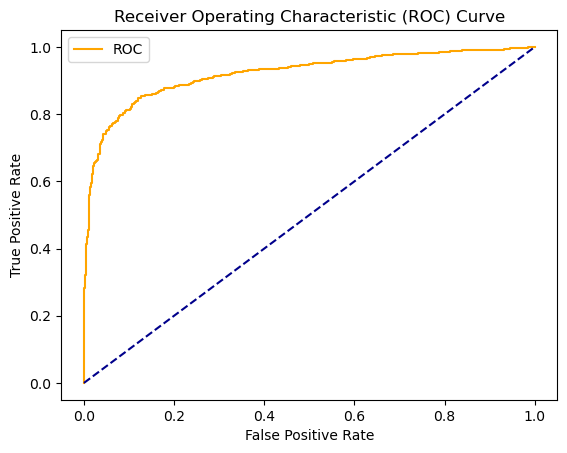

/Users/aman/miniforge3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



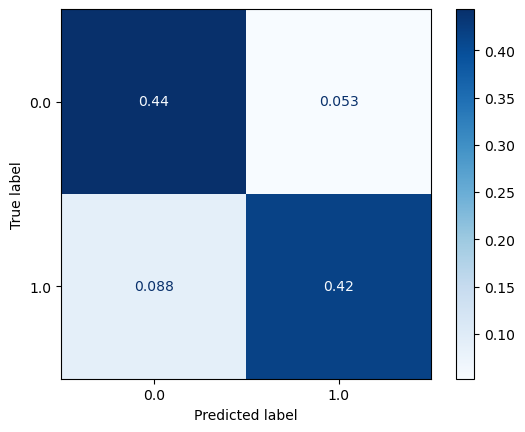

In [227]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 0.8437094682230869
ROC Area under Curve = 0.8437958967370731
Cohen's Kappa = 0.6874599466123034
Time taken = 0.011246204376220703
              precision    recall  f1-score   support

         0.0    0.83418   0.85490   0.84442       765
         1.0    0.85356   0.83269   0.84300       777

    accuracy                        0.84371      1542
   macro avg    0.84387   0.84380   0.84371      1542
weighted avg    0.84395   0.84371   0.84370      1542



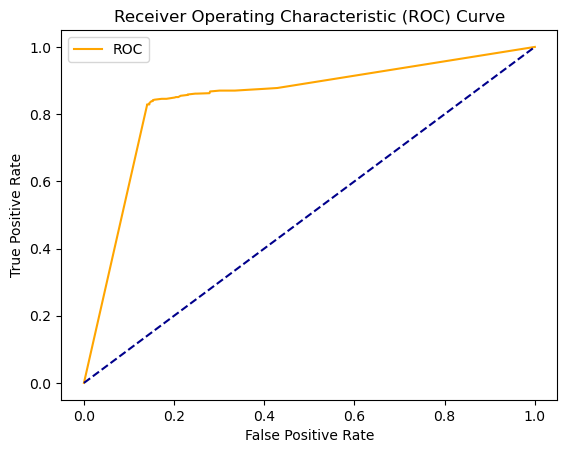

/Users/aman/miniforge3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



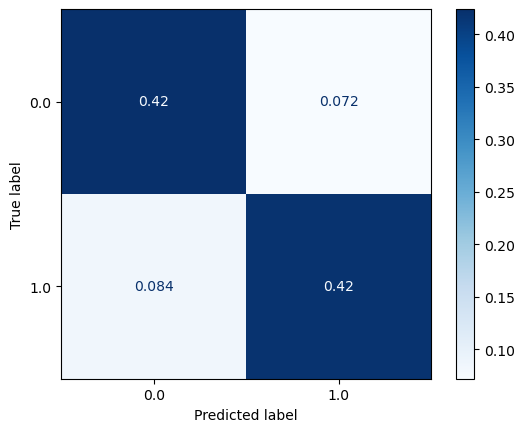

In [228]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

Accuracy = 0.8586251621271076
ROC Area under Curve = 0.8591919650743179
Cohen's Kappa = 0.717558213981438
Time taken = 8.2376868724823
              precision    recall  f1-score   support

         0.0    0.81115   0.93203   0.86740       765
         1.0    0.92157   0.78636   0.84861       777

    accuracy                        0.85863      1542
   macro avg    0.86636   0.85919   0.85800      1542
weighted avg    0.86679   0.85863   0.85793      1542



/Users/aman/miniforge3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



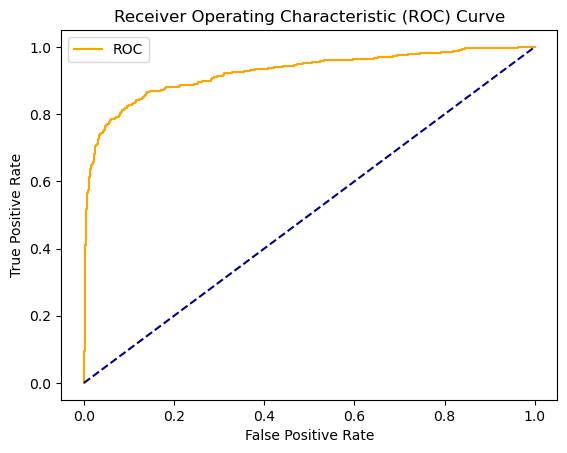

/Users/aman/miniforge3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



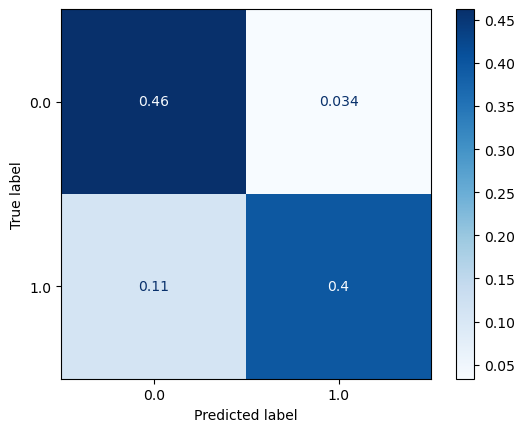

In [229]:
# Neural Network
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 500}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, coh_kap_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

Accuracy = 0.8871595330739299
ROC Area under Curve = 0.8875160875160876
Cohen's Kappa = 0.7744693083987715
Time taken = 0.582327127456665
              precision    recall  f1-score   support

         0.0    0.85305   0.93333   0.89139       765
         1.0    0.92766   0.84170   0.88259       777

    accuracy                        0.88716      1542
   macro avg    0.89035   0.88752   0.88699      1542
weighted avg    0.89064   0.88716   0.88695      1542



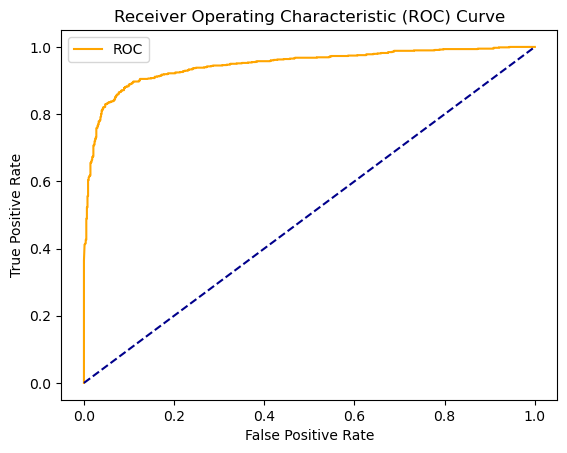

/Users/aman/miniforge3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



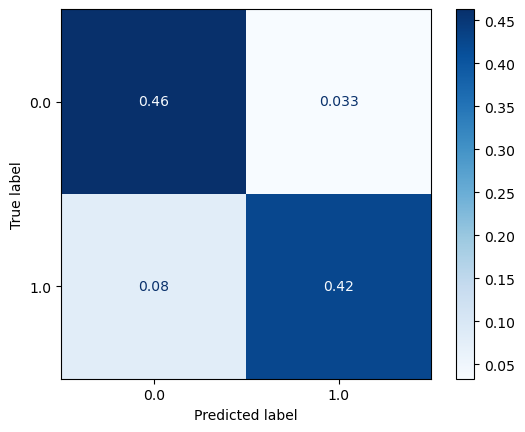

In [230]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

## Prediction

In [231]:
input_data = []

print('Enter the weather parameters of previous day: ')

attr1 = float(input("Enter Maximum Temperature: "))
attr2 = float(input("Enter Minimum Temperature: "))
attr3 = float(input("Enter Relative Humidity:"))
attr5 = float(input("Enter Surface Pressure: "))
attr6 = float(input("Enter Wind Speed at 10M Range: "))

input_data.append(attr1)
input_data.append(attr2)
input_data.append(attr3)
input_data.append(attr5)
input_data.append(attr6)

input_data = np.array(input_data) 
input_data.shape = (1,5)

print()
print('---------------------------------------------------------------------------------------')
print('Input Data: ', input_data)
input_data = scaler.transform(input_data)
print('Scaled Input Data:', input_data)

print()
lr_pred = 'No' if model_lr.predict(input_data)[0] == 0.0 else 'Yes'
rf_pred = 'No' if model_rf.predict(input_data)[0] == 0.0 else 'Yes'
nn_pred = 'No' if model_nn.predict(input_data)[0] == 0.0 else 'Yes'
dt_pred = 'No' if model_dt.predict(input_data)[0] == 0.0 else 'Yes'
print ('Prediction from Logistic Regression Model: ', lr_pred)
print ('Prediction from Random   Forest     Model: ', rf_pred)
print ('Prediction from Neural   Network    Model: ', nn_pred)
print ('Prediction from Decision Tree       Model: ', dt_pred)

Enter the weather parameters of previous day: 
Enter Maximum Temperature: 32.7
Enter Minimum Temperature: 17.8
Enter Relative Humidity:72.3
Enter Surface Pressure: 92.1
Enter Wind Speed at 10M Range: 2.6

---------------------------------------------------------------------------------------
Input Data:  [[32.7 17.8 72.3 92.1  2.6]]
Scaled Input Data: [[ 0.68530021  0.63779193  0.67843632 -0.98207885  0.38790036]]

Prediction from Logistic Regression Model:  Yes
Prediction from Random   Forest     Model:  No
Prediction from Neural   Network    Model:  Yes
Prediction from Decision Tree       Model:  No


/Users/aman/miniforge3/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names

